In [24]:
import numpy as np
import pandas as pd
import scipy.stats
import math

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import warnings
warnings.filterwarnings(action = "ignore")

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)

# Regression Problem

**1. Load Data and Find out if it has any missing values**

In [30]:
HP_df = pd.read_csv("A02_HousePricePrediction.csv")

In [31]:
print("Shape of Dataset :",HP_df.shape)

Shape of Dataset : (1460, 81)


In [32]:
HP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
HP_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [34]:
HP_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [35]:
HP_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

##**2. Correct the missing values**

In [36]:
HP_df1 = HP_df.copy()

In [37]:
y = HP_df1['SalePrice']

Id is a meaningless column when we fit model. So, we can drop it.


In [38]:
HP_df1.drop('Id',axis=1,inplace=True)

Alley, PoolQC, Fence, MiscFeature have too much missingvalues. Filling missing values doesn't make goodsense. So, we can drop it.

In [39]:
HP_df1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

MSSubClass gives categorical information. So, we can convert it into string.

In [40]:
HP_df1['MSSubClass'] = HP_df1['MSSubClass'].astype(str)

Filling Categorical Missing Values

If NA means not that feature available then we will fill with None and if NA means not a data available the we will fill with mode.

In [41]:
# Impute using a constant value
for column in [
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
]:
    HP_df1[column] = HP_df1[column].fillna("None")

# Impute using the column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    HP_df1[column] = HP_df1[column].fillna(HP_df1[column].mode()[0])

Fillling Numerical Missing Values

In [42]:
HP_df1.select_dtypes(np.number).loc[:,HP_df1.isna().sum() > 0].isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [43]:
for column in [
  'LotFrontage',
   'MasVnrArea',
   'GarageYrBlt'
]:
    HP_df1[column] = HP_df1[column].fillna(HP_df1[column].mean())

In [44]:
HP_df1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

##**3. Identify and encode necessary features**

In [45]:
HP_df2 = HP_df1.copy()

We will do some Feature Engineering.

In [46]:
HP_df2["SqFtPerRoom"] = HP_df2["GrLivArea"] / (HP_df2["TotRmsAbvGrd"] +
                                                       HP_df2["FullBath"] +
                                                       HP_df2["HalfBath"] +
                                                       HP_df2["KitchenAbvGr"])

HP_df2['Total_Home_Quality'] = HP_df2['OverallQual'] + HP_df2['OverallCond']

HP_df2['Total_Bathrooms'] = (HP_df2['FullBath'] + (0.5 * HP_df2['HalfBath']) +
                               HP_df2['BsmtFullBath'] + (0.5 * HP_df2['BsmtHalfBath']))

HP_df2["HighQualSF"] = HP_df2["1stFlrSF"] + HP_df2["2ndFlrSF"]

In [47]:
HP_df3 = HP_df2.copy()

Applying log transform for skewed features

In [48]:
skew_df = pd.DataFrame(HP_df3.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(HP_df3[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

Feature       Skew  Absolute Skew  Skewed
0          LotFrontage   2.382499       2.382499    True
1              LotArea  12.195142      12.195142    True
2          OverallQual   0.216721       0.216721   False
3          OverallCond   0.692355       0.692355    True
4            YearBuilt  -0.612831       0.612831    True
5         YearRemodAdd  -0.503044       0.503044    True
6           MasVnrArea   2.673661       2.673661    True
7           BsmtFinSF1   1.683771       1.683771    True
8           BsmtFinSF2   4.250888       4.250888    True
9            BsmtUnfSF   0.919323       0.919323    True
10         TotalBsmtSF   1.522688       1.522688    True
11            1stFlrSF   1.375342       1.375342    True
12            2ndFlrSF   0.812194       0.812194    True
13        LowQualFinSF   9.002080       9.002080    True
14           GrLivArea   1.365156       1.365156    True
15        BsmtFullBath   0.595454       0.595454    True
16        BsmtHalfBath   4.099186       4.099186    True
17            FullBath   0.036524       0.036524   False
18            HalfBath   0.675203       0.675203    True
19        BedroomAbvGr   0.211572       0.211572   False
20        KitchenAbvGr   4.483784       4.483784    True
21        TotRmsAbvGrd   0.675646       0.675646    True
22          Fireplaces   0.648898       0.648898    True
23         GarageYrBlt  -0.667488       0.667488    True
24          GarageCars  -0.342197       0.342197   False
25          GarageArea   0.179796       0.179796   False
26          WoodDeckSF   1.539792       1.539792    True
27         OpenPorchSF   2.361912       2.361912    True
28       EnclosedPorch   3.086696       3.086696    True
29           3SsnPorch  10.293752      10.293752    True
30         ScreenPorch   4.117977       4.117977    True
31            PoolArea  14.813135      14.813135    True
32             MiscVal  24.451640      24.451640    True
33              MoSold   0.211835       0.211835   False
34              YrSold   0.096170       0.096170   False
35           SalePrice   1.880941       1.880941    True
36         SqFtPerRoom   0.980817       0.980817    True
37  Total_Home_Quality  -0.424413       0.424413   False
38     Total_Bathrooms   0.264404       0.264404   False
39          HighQualSF   1.329103       1.329103    True

In [49]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    HP_df3[column] = np.log1p(HP_df3[column])

Applying cosine transform for cyclical features

In [50]:
HP_df3['MoSold'] = (-np.cos(0.5236 * HP_df3['MoSold']))

In [51]:
HP_df4 = HP_df3.copy()

In [52]:
cat_cols = list(HP_df4.select_dtypes(['object']).columns)

In [53]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

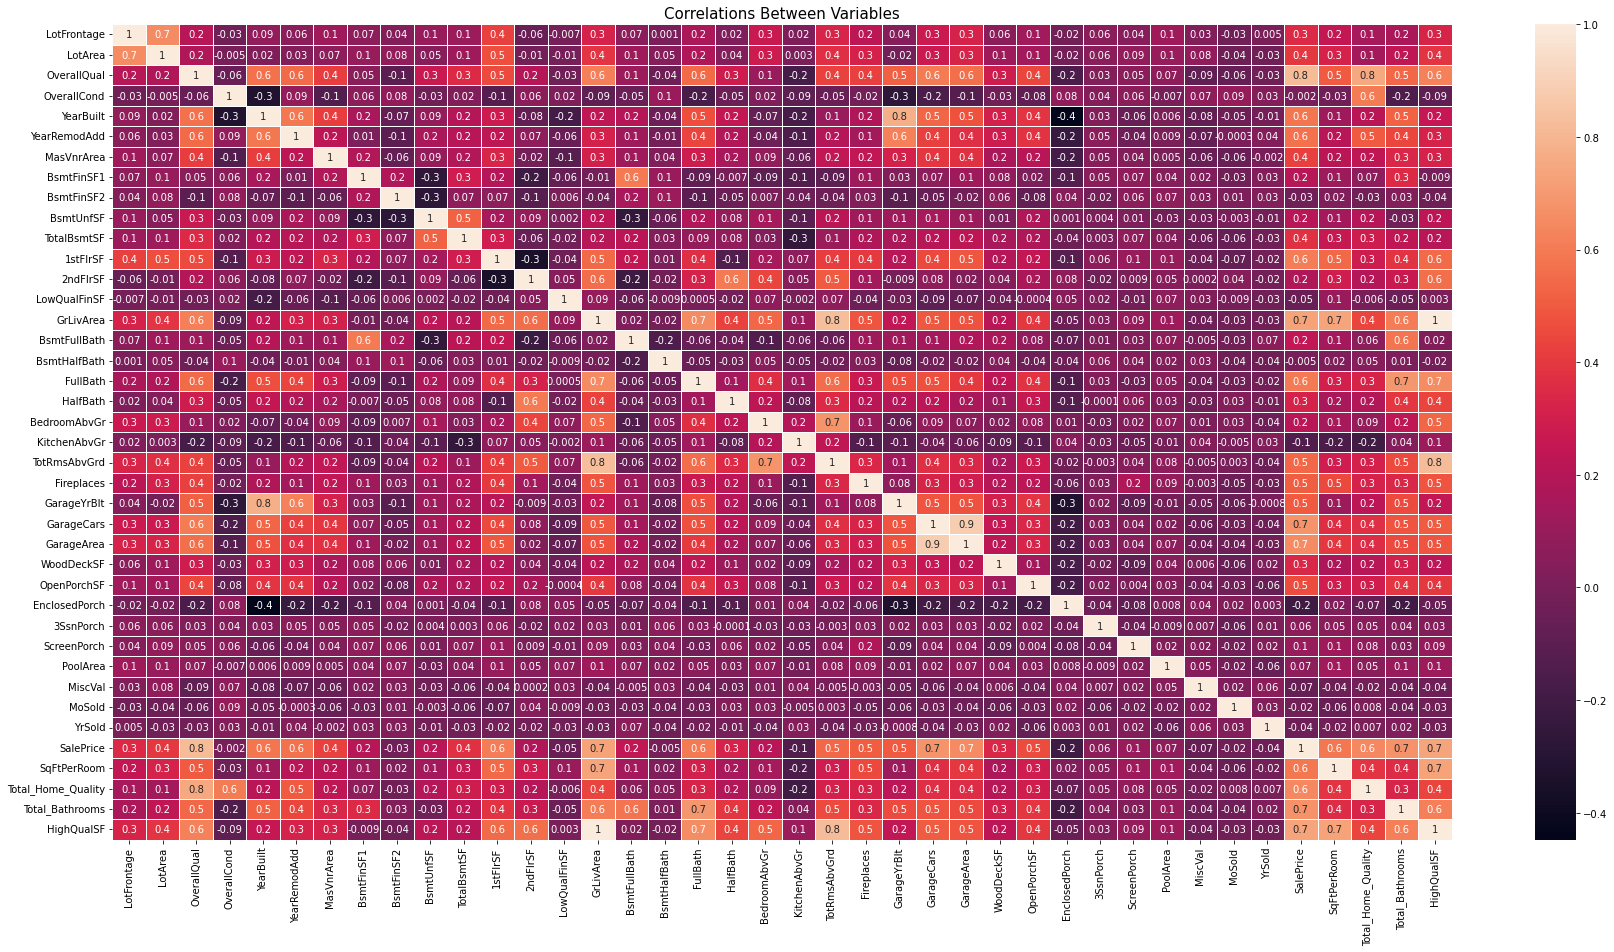

In [54]:
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(HP_df4.corr(), annot=True, linewidths=0.5, fmt='.1g')
plt.title("Correlations Between Variables", size=15)
plt.show()

In [55]:
important_num_cols = list(HP_df4.corr()["SalePrice"][(HP_df4.corr()["SalePrice"]>= 0.40)].index)
#some selecting features based on seeing description and domain knowledge
cat = ["MSZoning",'Street','LotShape','LandSlope',"Utilities","BldgType",'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
'ExterQual','HouseStyle',"Heating","KitchenQual","SaleCondition",'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Foundation']
important_cols = important_num_cols + cat_cols
imp_2 = important_num_cols + cat

In [56]:
imp_data = HP_df4[important_cols]
imp_data.head()

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  1stFlrSF  GrLivArea  \
0            7   7.602900      7.602900    5.283204  6.753438   7.444833   
1            6   7.589336      7.589336    0.000000  7.141245   7.141245   
2            7   7.601902      7.602401    5.093750  6.825460   7.488294   
3            7   7.557995      7.586296    0.000000  6.869014   7.448916   
4            8   7.601402      7.601402    5.860786  7.044033   7.695758   

   FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         2      2.197225    0.000000     7.602900           2         548   
1         2      1.945910    0.693147     7.589336           2         460   
2         2      1.945910    0.693147     7.601902           2         608   
3         1      2.079442    0.693147     7.600402           3         642   
4         2      2.302585    0.693147     7.601402           3         836   

   OpenPorchSF  SalePrice  SqFtPerRoom  Total_Home_Quality  Total_Bathrooms  \
0     4.127134  12.247699     4.966335                  12              3.5   
1     0.000000  12.109016     4.950335                  14              2.5   
2     3.761200  12.317171     5.190732                  12              3.5   
3     3.583519  11.849405     5.256337                  12              2.0   
4     4.442651  12.429220     5.136251                  13              3.5   

   HighQualSF MSSubClass MSZoning Street LotShape LandContour Utilities  \
0    7.444833         60       RL   Pave      Reg         Lvl    AllPub   
1    7.141245         20       RL   Pave      Reg         Lvl    AllPub   
2    7.488294         60       RL   Pave      IR1         Lvl    AllPub   
3    7.448916         70       RL   Pave      IR1         Lvl    AllPub   
4    7.695758         60       RL   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     Gable  CompShg     MetalSd     MetalSd       None        TA        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
0      PConc       Gd       TA           No          GLQ          Unf    GasA   
1     CBlock       Gd       TA           Gd          ALQ          Unf    GasA   
2      PConc       Gd       TA           Mn          GLQ          Unf    GasA   
3     BrkTil       TA       Gd           No          ALQ          Unf    GasA   
4      PConc       Gd       TA           Av          GLQ          Unf    GasA   

  HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
0        Ex          Y      SBrkr          Gd        Typ        None   
1        Ex          Y      SBrkr          TA        Typ          TA   
2        Ex          Y      SBrkr          Gd        Typ          TA   
3        Gd          Y      SBrkr          Gd        Typ          Gd   
4        Ex          Y      SBrkr          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y    

In [57]:
imp_data2 = HP_df4[imp_2] #for selecting cat_cols

Applying Ecoding

In [58]:
df_en = imp_data.copy()

In [59]:
imp_data = pd.get_dummies(imp_data)

In [60]:
imp_data.shape

(1460, 282)

In [61]:
imp_data2 = pd.get_dummies(imp_data2) #for selecting cat_cols

#**4. Identify and normalize necessary features**

In [62]:
HP_df5 = imp_data.copy()

In [63]:
scaler = StandardScaler()
scaler.fit(HP_df5)

HP_df5 = pd.DataFrame(scaler.transform(HP_df5), index=HP_df5.index, columns=HP_df5.columns)

In [64]:
HP_df5.head()

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  1stFlrSF  GrLivArea  \
0     0.651479   1.045180      0.877541    1.193074 -0.803645   0.529194   
1    -0.071836   0.163445     -0.424186   -0.815959  0.418479  -0.381965   
2     0.651479   0.980275      0.829642    1.121030 -0.576677   0.659631   
3     0.651479  -1.873790     -0.715872   -0.815959 -0.439421   0.541448   
4     1.374795   0.947798      0.733773    1.412710  0.112127   1.282295   

   FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0  0.789741      0.946985   -1.013562     1.016709    0.311725    0.351000   
1  0.789741     -0.226437    0.743356    -0.098044    0.311725   -0.060731   
2  0.789741     -0.226437    0.743356     0.934651    0.311725    0.631726   
3 -1.026041      0.397039    0.743356     0.811411    1.650307    0.790804   
4  0.789741      1.438928    0.743356     0.893592    1.650307    1.698485   

   OpenPorchSF  SalePrice  SqFtPerRoom  Total_Home_Quality  Total_Bathrooms  \
0     0.845209   0.560067    -0.483658            0.192175         1.642256   
1    -1.072916   0.212763    -0.576675            1.373547         0.368581   
2     0.675137   0.734046     0.820857            0.192175         1.642256   
3     0.592558  -0.437383     1.202248            0.192175        -0.268257   
4     0.991848   1.014651     0.504134            0.782861         1.642256   

   HighQualSF  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0    0.540045       -0.251724        -0.21236       -0.083045       -0.144841   
1   -0.370270       -0.251724        -0.21236       -0.083045       -0.144841   
2    0.670361       -0.251724        -0.21236       -0.083045       -0.144841   
3    0.552287       -0.251724        -0.21236       -0.083045       -0.144841   
4    1.292447       -0.251724        -0.21236       -0.083045       -0.144841   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0      -0.761634      -0.222721      -0.052414      -0.091035      -0.330791   
1       1.312966      -0.222721      -0.052414      -0.091035      -0.330791   
2      -0.761634      -0.222721      -0.052414      -0.091035      -0.330791   
3      -0.761634      -0.222721      -0.052414      -0.091035      -0.330791   
4      -0.761634      -0.222721      -0.052414      -0.091035      -0.330791   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0       1.970518      -0.207020      -0.105263      -0.203395      -0.117851   
1      -0.507481      -0.207020      -0.105263      -0.203395      -0.117851   
2       1.970518      -0.207020      -0.105263      -0.203395      -0.117851   
3      -0.507481       4.830459      -0.105263      -0.203395      -0.117851   
4       1.970518      -0.207020      -0.105263      -0.203395      -0.117851   

   MSSubClass_90  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0      -0.192177         -0.083045    -0.215859    -0.105263     0.518133   
1      -0.192177         -0.083045    -0.215859    -0.105263     0.518133   
2      -0.192177         -0.083045    -0.215859    -0.105263     0.518133   
3      -0.192177         -0.083045    -0.215859    -0.105263     0.518133   
4      -0.192177         -0.083045    -0.215859    -0.105263     0.518133   

   MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  \
0    -0.418955    -0.064238     0.064238     -0.704203     -0.169981   
1    -0.418955    -0.064238     0.064238     -0.704203     -0.169981   
2    -0.418955    -0.064238     0.064238      1.420045     -0.169981   
3    -0.418955    -0.064238     0.064238      1.420045     -0.169981   
4    -0.418955    -0.064238     0.064238      1.420045     -0.169981   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0     -0.083045      0.760512         -0.21236        -0.188311   
1     -0.083045      0.760512         -0.21236        -0.188311   
2     -0.083045     -1.314904         -0.21236        -0

In [65]:
HP_df6 = HP_df5.copy()

In [66]:
#for selecting cat_cols
HP = imp_data2
scaler = StandardScaler()
scaler.fit(HP)

HP_df5 = pd.DataFrame(scaler.transform(HP), index=HP.index, columns=HP.columns)

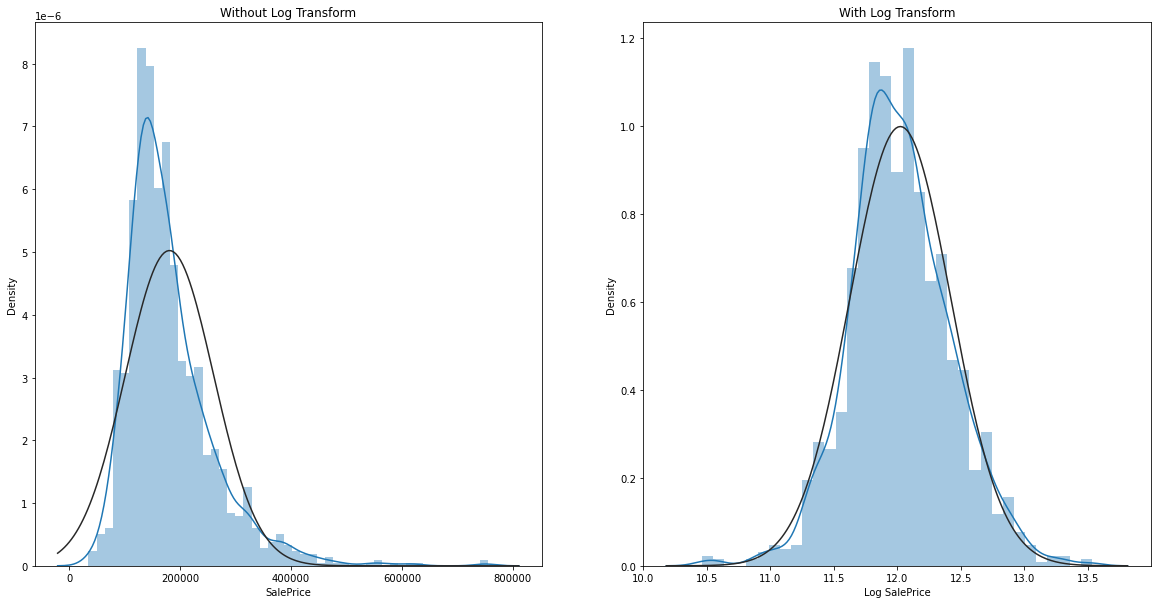

In [67]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(y, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(y), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [68]:
log_y = np.log(y)

In [69]:
HP_df6.drop('SalePrice',axis=1,inplace=True)

In [70]:
HP_df6.shape

(1460, 281)

In [71]:
HP.drop('SalePrice',axis=1,inplace=True)

In [72]:
HP.shape

(1460, 158)

#**5. Split the dataset into train set (75%) test set (15%) an validation set (10%)**

In [73]:
X_train, X_temp, y_train, y_temp = train_test_split(HP_df6, log_y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [74]:
#for selecting cat cols
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(HP, log_y, test_size=0.25, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.4, random_state=42)

In [75]:
X_train2

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  1stFlrSF  GrLivArea  \
1023            7   7.603898      7.604396    2.708050  7.316548   7.316548   
810             6   7.588324      7.600902    4.605170  7.177782   7.177782   
1384            6   7.570443      7.576097    0.000000  6.549651   7.138073   
626             5   7.581210      7.590347    0.000000  7.260523   7.260523   
813             6   7.580189      7.580189    5.497168  7.274480   7.274480   
...           ...        ...           ...         ...       ...        ...   
1095            6   7.604396      7.604396    0.000000  7.181592   7.181592   
1130            4   7.564757      7.576097    0.000000  7.192182   7.591862   
1294            5   7.578657      7.596392    0.000000  6.762730   6.762730   
860             7   7.559559      7.600402    0.000000  6.816736   7.263330   
1126            7   7.604894      7.604894    4.875197  7.349874   7.349874   

      FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1023         2      2.079442    0.693147     7.603898           2         437   
810          1      1.791759    0.693147     7.588324           2         484   
1384         1      1.945910    0.000000     7.570443           1         280   
626          1      1.945910    0.693147     7.581210           1         286   
813          1      2.079442    0.000000     7.580189           1         301   
...        ...           ...         ...          ...         ...         ...   
1095         2      1.945910    0.693147     7.604396           2         440   
1130         2      2.079442    1.098612     7.591862           2         576   
1294         1      1.791759    0.000000     7.579679           2         572   
860          1      2.079442    0.693147     7.563201           1         216   
1126         2      2.079442    0.693147     7.604894           3         660   

      OpenPorchSF  SqFtPerRoom  Total_Home_Quality  Total_Bathrooms  \
1023     3.044522     5.019925                  12              2.0   
810      0.000000     5.103670                  12              2.5   
1384     0.000000     5.064176                  11              1.0   
626      0.000000     5.185988                  10              1.0   
813      0.000000     4.978112                  12              1.5   
...           ...          ...                 ...              ...   
1095     3.135494     4.990433                  11              2.0   
1130     3.806662     5.293807                   7              3.0   
1294     0.000000     4.823732                  12              2.0   
860      5.484797     4.967032                  15              1.5   
1126     3.044522     5.053056                  12              2.0   

      HighQualSF  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1023    7.316548                 0            0            0            1   
810     7.177782                 0            0            0            1   
1384    7.138073                 0            0            0            1   
626     7.260523                 0            0            0            1   
813     7.274480                 0            0            0            1   
...          ...               ...          ...          ...          ...   
1095    7.181592                 0            0            0            1   
1130    7.591862                 0            0            0            1   
1294    6.762730                 0            0            0            1   
860     7.263330                 0            0            0            1   
1126    7.349874                 0            0            0            1   

      MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  \
1023            0            0            1             0             0   
810             0            0            1             0             0   
1384            0            0            1             0             0   
626   

#**6. For Regression Task: Write a code manually for Linear Regression and compare the results with sklearns linear regression model.**

In [76]:

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [77]:
def evaluate_regression_model(model,model_name,x_train,y_train,x_test,y_test,x_valid,y_valid):

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_val_pred = model.predict(x_valid)

    Training_Score = np.round(model.score(x_train,y_train),2)
    Testing_Score = np.round(model.score(x_test,y_test),2)
    Validation_score = np.round(model.score(x_valid,y_valid),2)

    mse_training = np.round(mean_squared_error(y_train,y_train_pred),2)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),2)
    mse_validation = np.round(mean_squared_error(y_valid,y_val_pred),2)

    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),2)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),2)
    mae_valid = np.round(mean_absolute_error(y_valid,y_val_pred),2)

    r2_training = np.round(r2_score(y_train,y_train_pred),2)
    r2_testing = np.round(r2_score(y_test,y_test_pred),2)
    r2_valid = np.round(r2_score(y_valid,y_val_pred),2)


    print("Model Performance for:",model_name)
    print("")

    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("Validation Score",Validation_score)
    print("")

    print("Training Data Root Mean Squared Error:",math.sqrt(mse_training))
    print("Testing Data Root Mean Squared Error:",math.sqrt(mse_testing))
    print("Validation Root Data Mean Squared Error:",math.sqrt(mse_validation))

    print("")

    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("Validation Data Mean Absolute Error:",mae_valid)
    print("")

    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("Validation Data r2_score:",r2_valid)
    print("")

    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions')
    plt.scatter(y_valid,(y_valid-y_val_pred),color = 'blue',label = "Validation Predictions")
    plt.legend()
    plt.show()


    return Training_Score,Testing_Score,Validation_score,mse_training,mse_testing,mse_validation,mae_training,mae_testing,mae_valid,r2_training,r2_testing,r2_valid

Model Performance for: Linear Regression

Training Score: 0.94
Testing Score: -1.8389513827349934e+21
Validation Score -3.572305357184274e+20

Training Data Root Mean Squared Error: 0.1
Testing Data Root Mean Squared Error: 17152317419.802612
Validation Root Data Mean Squared Error: 8023373406.427185

Training Data Mean Absolute Error: 0.07
Testing Data Mean Absolute Error: 3077768821.5
Validation Data Mean Absolute Error: 819515815.61

Training Data r2_score: 0.94
Testing Data r2_score: -1.8389513827349934e+21
Validation Data r2_score: -3.572305357184274e+20

Residual Analysis:


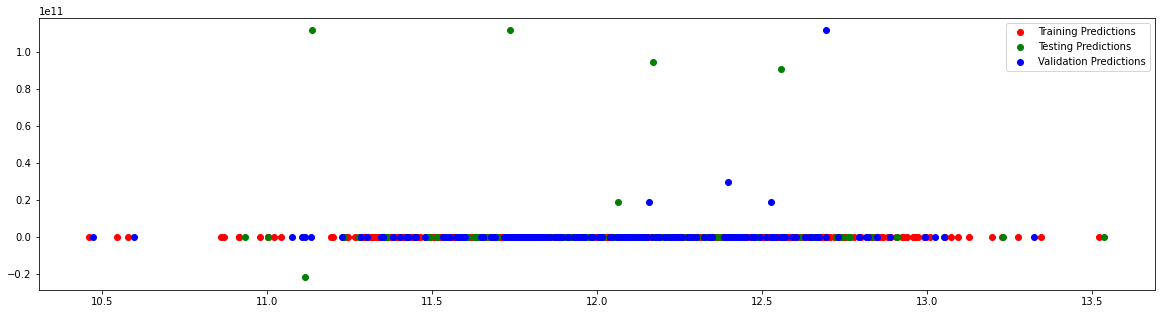

In [78]:
l = evaluate_regression_model(lr, 'Linear Regression', X_train, y_train, X_test, y_test, X_val, y_val)

**Here we can see that bias low but varince high that means Linear regression is over fitting on this data**


** One of the reason is that there are so many features.  **


**we can reduce over fitting problem using feature selection**

In [79]:
#for selecting cat cols
lr2 = LinearRegression()
lr2.fit(X_train2,y_train2)

LinearRegression()

**For selecting categorical columns:**

Model Performance for: Linear Regression

Training Score: 0.91
Testing Score: 0.9
Validation Score 0.88

Training Data Root Mean Squared Error: 0.1
Testing Data Root Mean Squared Error: 0.1414213562373095
Validation Root Data Mean Squared Error: 0.1414213562373095

Training Data Mean Absolute Error: 0.08
Testing Data Mean Absolute Error: 0.09
Validation Data Mean Absolute Error: 0.1

Training Data r2_score: 0.91
Testing Data r2_score: 0.9
Validation Data r2_score: 0.88

Residual Analysis:


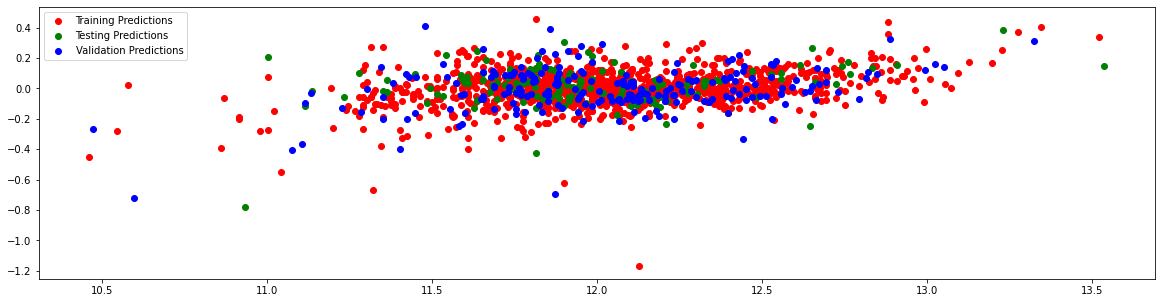

In [80]:
l2 = evaluate_regression_model(lr2, 'Linear Regression', X_train2, y_train2, X_test2, y_test2, X_val2, y_val2)

After selecting important categorical columns manually it's gives better result.

# Classification Problem

In [83]:
hd = pd.read_csv("A02_heart.csv")

In [84]:
hd.sample(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
44    39    1   2       140   321    0        0      182      0      0.0   
111   57    1   2       150   126    1        1      173      0      0.2   
275   52    1   0       125   212    0        1      168      0      1.0   
202   58    1   0       150   270    0        0      111      1      0.8   
194   60    1   2       140   185    0        0      155      0      3.0   
99    53    1   2       130   246    1        0      173      0      0.0   
4     57    0   0       120   354    0        1      163      1      0.6   
208   49    1   2       120   188    0        1      139      0      2.0   
52    62    1   2       130   231    0        1      146      0      1.8   
129   74    0   1       120   269    0        0      121      1      0.2   

     slope  ca  thal  target  
44       2   0     2       1  
111      2   1     3       1  
275      2   2     3       0  
202      2   0     3       0  
194      1   0     2       0  
99       2   3     2       1  
4        2   0     2       1  
208      1   3     3       0  
52       1   3     3       1  
129      2   1     2       1

Age (age in years)


Sex (1 = male; 0 = female)

CP (chest pain type)

TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))

CHOL (serum cholestoral in mg/dl)

FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

RESTECH (resting electrocardiographic results)

THALACH (maximum heart rate achieved)

EXANG (exercise induced angina (1 = yes; 0 = no))

OLDPEAK (ST depression induced by exercise relative to rest)

SLOPE (the slope of the peak exercise ST segment)

CA (number of major vessels (0-3) colored by flourosopy)

THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)

TARGET (1 or 0)


## Missing value

In [85]:
hd.shape

(303, 14)

In [86]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [87]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [88]:
hd.isna().sum().sum()

0

No missing values

## Model

In [89]:
y = hd["target"]
x = hd.drop(['target'],axis=1)
x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_test,x_valid,y_test,y_valid = train_test_split(x_part,y_part,test_size = 0.40,random_state = 42)

In [90]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [91]:
print("Train set size:", len(x_train))
print("Test set size:", len(x_test))
print("Validation set size:", len(x_valid))

Train set size: 227
Test set size: 45
Validation set size: 31


In [92]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix for test data")
print(lr_conf_matrix)



confussion matrix for test data
[[16  5]
 [ 1 23]]


In [93]:
def evaluate_classification_model(model,model_name,X_train,y_train,X_test,y_test,X_valid,y_valid):

    print(f"Model performance for {model_name}")
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    y_test_pred = model.predict(X_test)

    #accuracy score
    accuracy_score_train = round(accuracy_score(y_train, y_train_pred),4)
    accuracy_score_valid = round(accuracy_score(y_valid, y_valid_pred),4)
    accuracy_score_test = round(accuracy_score(y_test, y_test_pred),4)

    #precision score
    precision_score_train = round(precision_score(y_train,y_train_pred),4)
    precision_score_valid = round(precision_score(y_valid,y_valid_pred),4)
    precision_score_test = round(precision_score(y_test,y_test_pred),4)

    #recallscore
    recall_score_train = round(recall_score(y_train,y_train_pred),4)
    recall_score_valid = round(recall_score(y_valid,y_valid_pred),4)
    recall_score_test = round(recall_score(y_test,y_test_pred),4)

    #f1 score
    f1_score_train = round(f1_score(y_train,y_train_pred),4)
    f1_score_valid = round(f1_score(y_valid,y_valid_pred),4)
    f1_score_test = round(f1_score(y_test,y_test_pred),4)

    print()
    print(f'Accuracy Score Train : {accuracy_score_train}')
    print(f'Accuracy Score Validation : {accuracy_score_valid}')
    print(f'Accuracy Score Test : {accuracy_score_test}')

    print()
    print(f"Precision Score Train : {precision_score_train}")
    print(f"Precision Score Validation : {precision_score_valid}")
    print(f"Precision Score Test : {precision_score_test}")

    print()
    print(f"recall Score Train : {recall_score_train}")
    print(f"recall Score Validation : {recall_score_valid}")
    print(f"recal Score Test : {recall_score_test}")

    print()
    print(f"f1 Score Train : {f1_score_train}")
    print(f"f1 Score Validation : {f1_score_valid}")
    print(f"f1 Score Test : {f1_score_test}")

    print()
    #confusion matrix
    plt.figure(figsize = (3,3))
    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot = True)
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy_score_train,accuracy_score_valid,accuracy_score_test,precision_score_train,precision_score_valid,precision_score_test,recall_score_train,recall_score_valid,recall_score_test,f1_score_train,f1_score_valid,f1_score_test


In [94]:
model1 = LogisticRegression(random_state=42)
%time model1.fit(x_train, y_train)

CPU times: total: 15.6 ms
Wall time: 11.4 ms


LogisticRegression(random_state=42)

Model performance for Logistic Regression

Accuracy Score Train : 0.859
Accuracy Score Validation : 0.9032
Accuracy Score Test : 0.8667

Precision Score Train : 0.8433
Precision Score Validation : 1.0
Precision Score Test : 0.8214

recall Score Train : 0.9113
recall Score Validation : 0.8235
recal Score Test : 0.9583

f1 Score Train : 0.876
f1 Score Validation : 0.9032
f1 Score Test : 0.8846



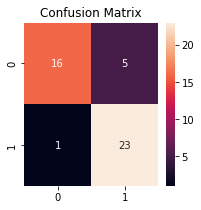

In [95]:
lg1= evaluate_classification_model(model1, 'Logistic Regression',x_train,y_train,x_test,y_test,x_valid,y_valid)

In [96]:
class LogisticRegression:

    # necessary data
    def __init__(self , lr = 0, num_iter = 1000000, fit_intercept = True, verbose = False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    # adding intercept
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept, X) ,axis = 1)

    # sigmodial funtion
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))

    # cost function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

    # main model
    def fit(self, X, y):

        if self.fit_intercept:
            X = self.__add_intercept(X)

        # wait initialization

        self.theta = np.zeros(X.shape[1])


        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)

            gradient = np.dot(X.T , (h - y))/y.size
            self.theta -= self.lr * gradient

            z = np.dot(X, self.theta)

            h = self.__sigmoid(z)

            loss = self.__loss(h, y)

            if (self.verbose == True and i%10000 == 0):
                print(f'loss: {loss}\t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()




In [97]:
model2 = LogisticRegression(lr=0.1, num_iter=300000)

In [98]:
%time model2.fit(x_train, y_train)

CPU times: total: 3min 42s
Wall time: 6min 55s


In [99]:
model2.theta

array([ 0.15328308, -0.01623626, -0.73913359,  0.95191042, -0.23839258,
       -0.13496983,  0.02998904,  0.43398129,  0.37927235, -0.54132062,
       -0.72307913,  0.46558089, -0.89926841, -0.6474124 ])

Model performance for LR from scratch

Accuracy Score Train : 0.8634
Accuracy Score Validation : 0.871
Accuracy Score Test : 0.8444

Precision Score Train : 0.8496
Precision Score Validation : 0.9333
Precision Score Test : 0.8148

recall Score Train : 0.9113
recall Score Validation : 0.8235
recal Score Test : 0.9167

f1 Score Train : 0.8794
f1 Score Validation : 0.875
f1 Score Test : 0.8627



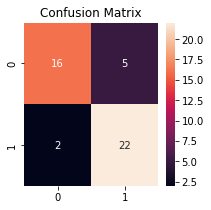

In [100]:
lg2 = evaluate_classification_model(model2, 'LR from scratch',x_train,y_train,x_test,y_test,x_valid,y_valid)

In [101]:
model_performance = [["LR",lg1[0],lg1[1],lg1[2],lg1[3],lg1[4],lg1[5],lg1[6],lg1[7],lg1[8],lg1[9],lg1[10],lg1[11]],
                     ["LR from scratch ",lg2[0],lg2[1],lg2[2],lg2[3],lg2[4],lg2[5],lg2[6],lg2[7],lg2[8],lg2[9],lg2[10],lg2[11]]]

In [102]:
model_performance = pd.DataFrame(model_performance,columns = ["Model Name","Accuracy Score Train","Accuracy Score Validation","Accuracy Score Test","Precision Score Train","Precision Score Validation","Precision Score Test","Recall Score Train","Recall Score Validation","Recall Score Test","F1 Score Train","F1 Score Validation","F1 Score Test"])

In [103]:
model_performance

Model Name  Accuracy Score Train  Accuracy Score Validation  \
0                LR                0.8590                     0.9032   
1  LR from scratch                 0.8634                     0.8710   

   Accuracy Score Test  Precision Score Train  Precision Score Validation  \
0               0.8667                 0.8433                      1.0000   
1               0.8444                 0.8496                      0.9333   

   Precision Score Test  Recall Score Train  Recall Score Validation  \
0                0.8214              0.9113                   0.8235   
1                0.8148              0.9113                   0.8235   

   Recall Score Test  F1 Score Train  F1 Score Validation  F1 Score Test  
0             0.9583          0.8760               0.9032         0.8846  
1             0.9167          0.8794               0.8750         0.8627

Here we can see that Logistic Regression and Logistic Regression from scratch both are not a over fitting not a under fitiing.